# **Project Name**    - Car Price Prediction with Machine Learning



##### **Project Type**    - Regression
##### **Industry**    -  Car Dealers
##### **Contribution**    - Individual
##### **Member Name -** Saneesh S S


# **Project Summary **

**🎯Objective:** 

Develop a machine learning model that accurately predicts car prices based on a variety of influential features.

**💡Why Car Price Prediction?** 

Car prices are influenced by numerous factors such as brand, features, horsepower, fuel efficiency, and more. 

Leveraging machine learning allows us to:

* Predict prices more accurately.

* Discover patterns in the data.

* Provide insights that could help buyers, sellers, and manufacturers make informed decisions.

**Key Tasks:**

1. **Data Collection:** Gather data on various car attributes and their corresponding prices.
2. **Data Preprocessing:** Clean, transform, and prepare the data for modeling.
3. **Feature Engineering:** Identify the most important features for price prediction.
4. **Model Building:** Create a machine learning model capable of predicting car prices.
5. **Model Evaluation:** Assess the model's accuracy and performance using appropriate metrics.
6. **Deployment:** Make the trained model available for car price predictions.

**Benefits:** By completing this project, we'll gain valuable insights into machine learning, data analysis, and the automotive industry. We'll also have a functional car price prediction model that can be useful for future car pricing decisions.

# **GitHub Link -**

**GitHub Link -** https://github.com/saneeshss/ML

# **Problem Statement**


**Project Overview:**

In the automotive industry, determining the price of a car involves various factors, such as brand reputation, car features, horsepower, and fuel efficiency. Car price prediction is a crucial application of machine learning. This project is designed to help you learn how to build a model for car price prediction.

**Key Objectives:**

- Explore the factors affecting car prices.
- Create a machine learning model to predict car prices.
- Gain valuable experience in the field of machine learning and automotive pricing.

# ***Let's Begin !***

## ***1. Know The Data***

### Import Libraries

In [173]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [174]:
# Load dataset from GitHub
url = "https://raw.githubusercontent.com/saneeshss/ML/refs/heads/main/car%20data.csv"

# Read the CSV file using pandas
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Dataset First View

In [175]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Dataset Rows & Columns count

In [176]:
# Get number of rows and columns
rows, columns = df.shape

print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")


Number of Rows: 301
Number of Columns: 9


### Dataset Information

In [177]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### Duplicate Values

In [178]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 2


#### Missing Values/Null Values

In [179]:
# Missing Values/Null Values Count
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

#### Missing Values/Null Values visual representation:

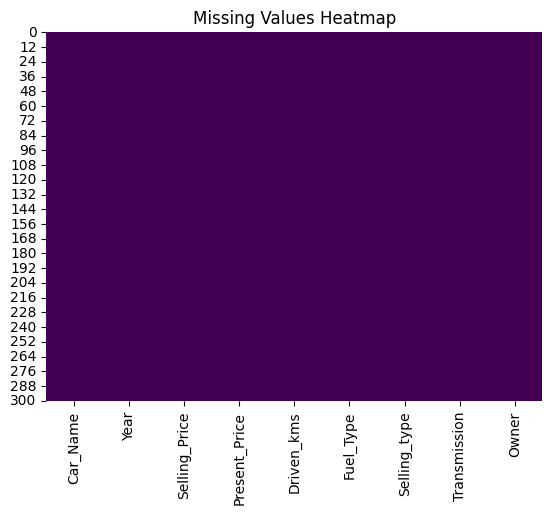

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap to visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


### Exploratory Data Analysis (EDA)

#### Target Variable Distribution – Selling_Price

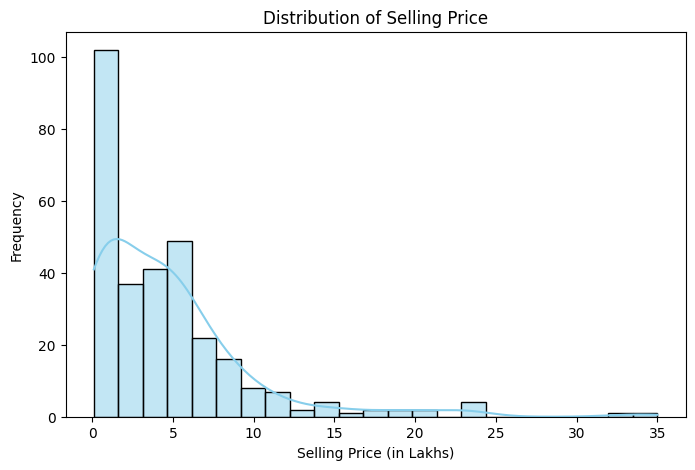

In [181]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], kde=True, color='skyblue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (in Lakhs)')
plt.ylabel('Frequency')
plt.show()


#### Price vs. Present Price

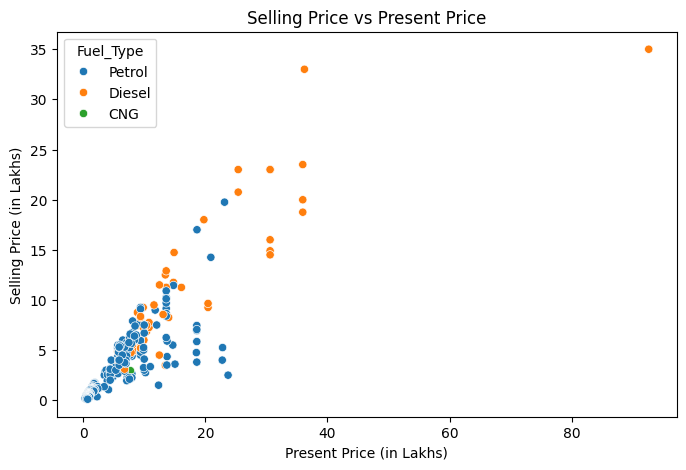

In [182]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, hue='Fuel_Type')
plt.title('Selling Price vs Present Price')
plt.xlabel('Present Price (in Lakhs)')
plt.ylabel('Selling Price (in Lakhs)')
plt.show()

#### Car Count by Fuel Type

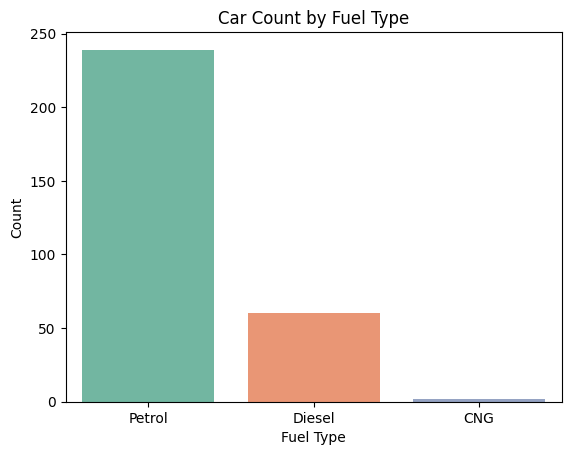

In [183]:
sns.countplot(x='Fuel_Type', data=df, palette='Set2')
plt.title('Car Count by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


#### Selling Price by Transmission Type

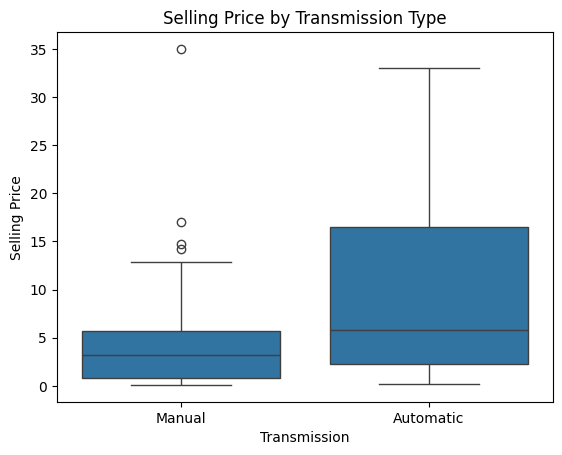

In [184]:
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()


#### Correlation Heatmap

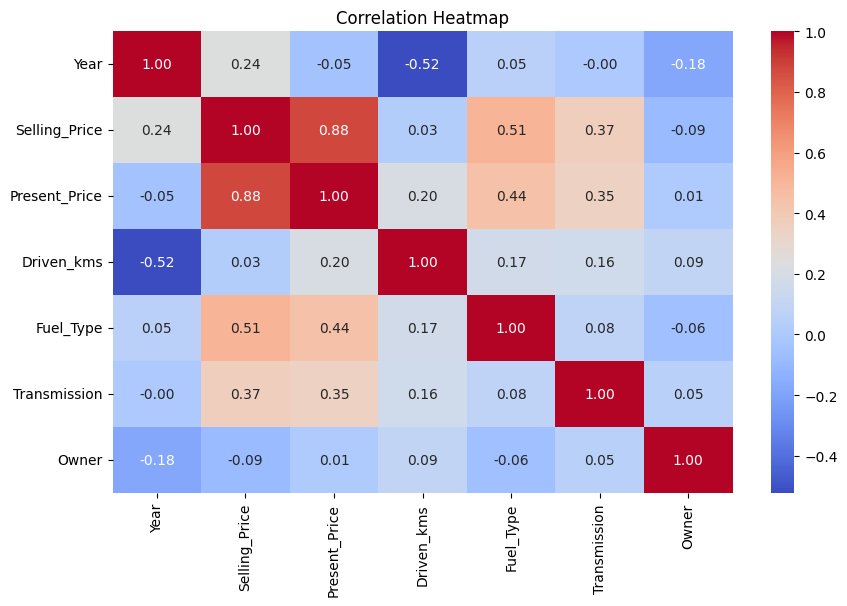

In [185]:
df_corr = df.copy()

# Replace categorical variables with numeric codes
df_corr.replace({
    'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2},
    'Seller_Type': {'Dealer': 0, 'Individual': 1},
    'Transmission': {'Manual': 0, 'Automatic': 1}
}, inplace=True)

# Drop non-numeric columns
df_corr = df_corr.select_dtypes(include=[np.number])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### What did i know about the dataset?

* The car dataset consists of Cars Name, Price details, No. of Owner etc. of different cars.
* There are 301 rows and 9 columns provided in the data.
* 2 duplicate rows present in the dataset.
* Null values not exist in the dataset.

## ***2. Understanding The Variables***

In [186]:
# Dataset Columns
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [187]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.00,301.00,301.00,301.00,301,301,301,301.00
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.63,4.66,7.63,36947.21,NaN,NaN,NaN,0.04
std,NaN,2.89,5.08,8.64,38886.88,NaN,NaN,NaN,0.25
min,NaN,2003.00,0.10,0.32,500.00,NaN,NaN,NaN,0.00
25%,NaN,2012.00,0.90,1.20,15000.00,NaN,NaN,NaN,0.00
50%,NaN,2014.00,3.60,6.40,32000.00,NaN,NaN,NaN,0.00
75%,NaN,2016.00,6.00,9.90,48767.00,NaN,NaN,NaN,0.00


### Check Unique Values for each variable.

In [188]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Car_Name is 98
No. of unique values in Year is 16
No. of unique values in Selling_Price is 156
No. of unique values in Present_Price is 148
No. of unique values in Driven_kms is 206
No. of unique values in Fuel_Type is 3
No. of unique values in Selling_type is 2
No. of unique values in Transmission is 2
No. of unique values in Owner is 3


In [189]:
# Loop through each column and print unique values
for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print('-' * 50)


Unique values in 'Car_Name':
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Ave

## ***3. Data Wrangling***

### Data Wrangling Code

In [190]:
# Adding a 'Current Year' column with a constant value of 2025 to the DataFrame
df['Current Year'] = 2025

# Calculating the age of the vehicles by subtracting the 'Year' column from the 'Current Year'
df['no_year'] = df['Current Year'] - df['Year']

In [191]:
# Removing the 'Current Year' column as it's no longer needed
df.drop(['Current Year'], axis=1, inplace=True)

In [192]:
# New updated DataFrame
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [193]:
# Defining dependent variable
dependent_variable = ['Selling_Price']

In [194]:
dependent_variable

['Selling_Price']

### What all manipulations have i done and insights i found?

*   Adding a new column as 'no_year' by substracting the 'Year' from the 'Current Year' (which is taken as 2025).
*   Drop the 'Current Year' column from the DataFrame.







## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Top 10 Most Selling Car

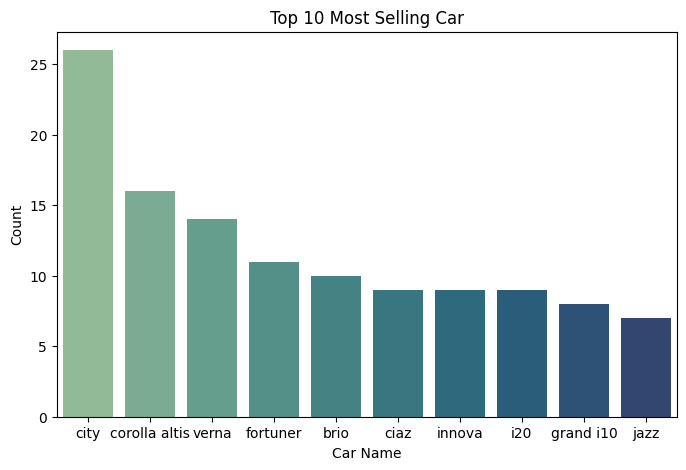

In [195]:
# Chart - 1 Count plot visualization code for top 10 most selling car
# Count the occurrences of each unique car name in the 'Car_Name' column and take the top 10 most selling car
top10 = df['Car_Name'].value_counts()[:10]

# Create a count plot to visualize the top 10 car
plt.figure(figsize=(8, 5))
sns.countplot(x='Car_Name', data=df, order=top10.index, palette='crest')

# Set labels and title for the plot
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

# Display the plot
plt.show()

##### What is/are the insight(s) found from the chart?

From the above chart, we got to know that 'city' is the top most selling car, followed by corolla altis, verna, fortuner and brio.

#### Chart - 2 : Number of Cars Bought Each Year

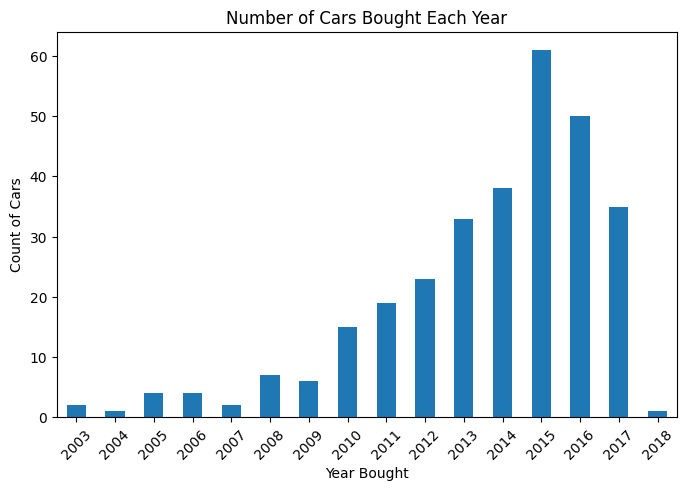

In [196]:
# Chart - 2 Bar plot visualization code for Number of Cars Bought Each Year
# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Group the data by the 'Year' column and count the number of occurrences for each year
yearly_counts = df.groupby('Year').count()['Car_Name']

# Create a bar plot to visualize the count of cars bought in each year
yearly_counts.plot(kind='bar')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Set labels and title for the plot
plt.xlabel('Year Bought')
plt.ylabel('Count of Cars')
plt.title('Number of Cars Bought Each Year')

# Display the plot
plt.show()

##### What is/are the insight(s) found from the chart?

From the above chart, we got to know that 2015 has the highest count of car purchases (popular year for buying cars), followed by 2016 and 2014.

#### Chart - 3 : Distribution of Categorical Variable

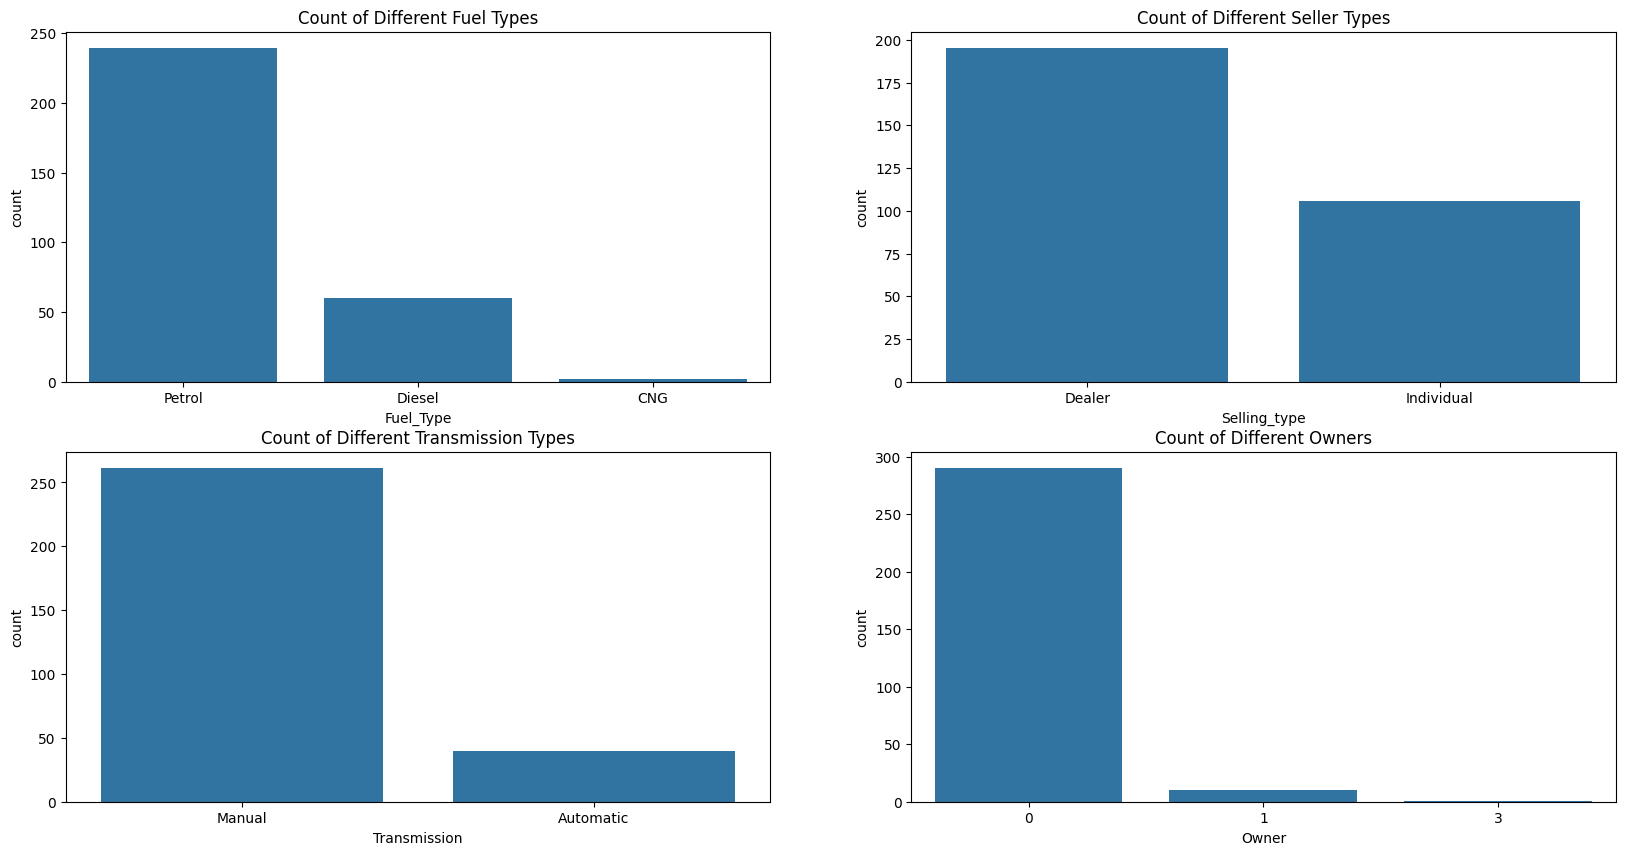

In [197]:
# Chart - 3 Count plot visualization code for Categorical Variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Count of different Fuel Types
plt.subplot(2,2,1)
sns.countplot(data=df, x = 'Fuel_Type')
plt.title("Count of Different Fuel Types")

# Subplot 2: Count of different Seller Types
plt.subplot(2,2,2)
sns.countplot(data=df, x = 'Selling_type')
plt.title("Count of Different Seller Types")

# Subplot 3: Count of different Transmission Types
plt.subplot(2,2,3)
sns.countplot(data=df, x = 'Transmission')
plt.title("Count of Different Transmission Types")

# Subplot 4: Count of different Owners
plt.subplot(2,2,4)
sns.countplot(data=df, x = 'Owner')
plt.title("Count of Different Owners")

# Display the plot
plt.show()

##### What is/are the insight(s) found from the chart?

From the above plots we can analyse that:

* The number of cars having their 'Fuel_Type' type as Petrol is greater when compared to the other types namely: Diesel and CNG.
* We can observe that most of the cars are sold through Dealers when compared to the Individual sellers.
* We clearly see that Manual cars are much more in number when compared to Automatic cars.
* Most of the cars are sold by the First Owners and negligible number of cars are sold by the Third or Fourth Owners.

#### Chart - 4 : Categorical Variable vs Target Variable

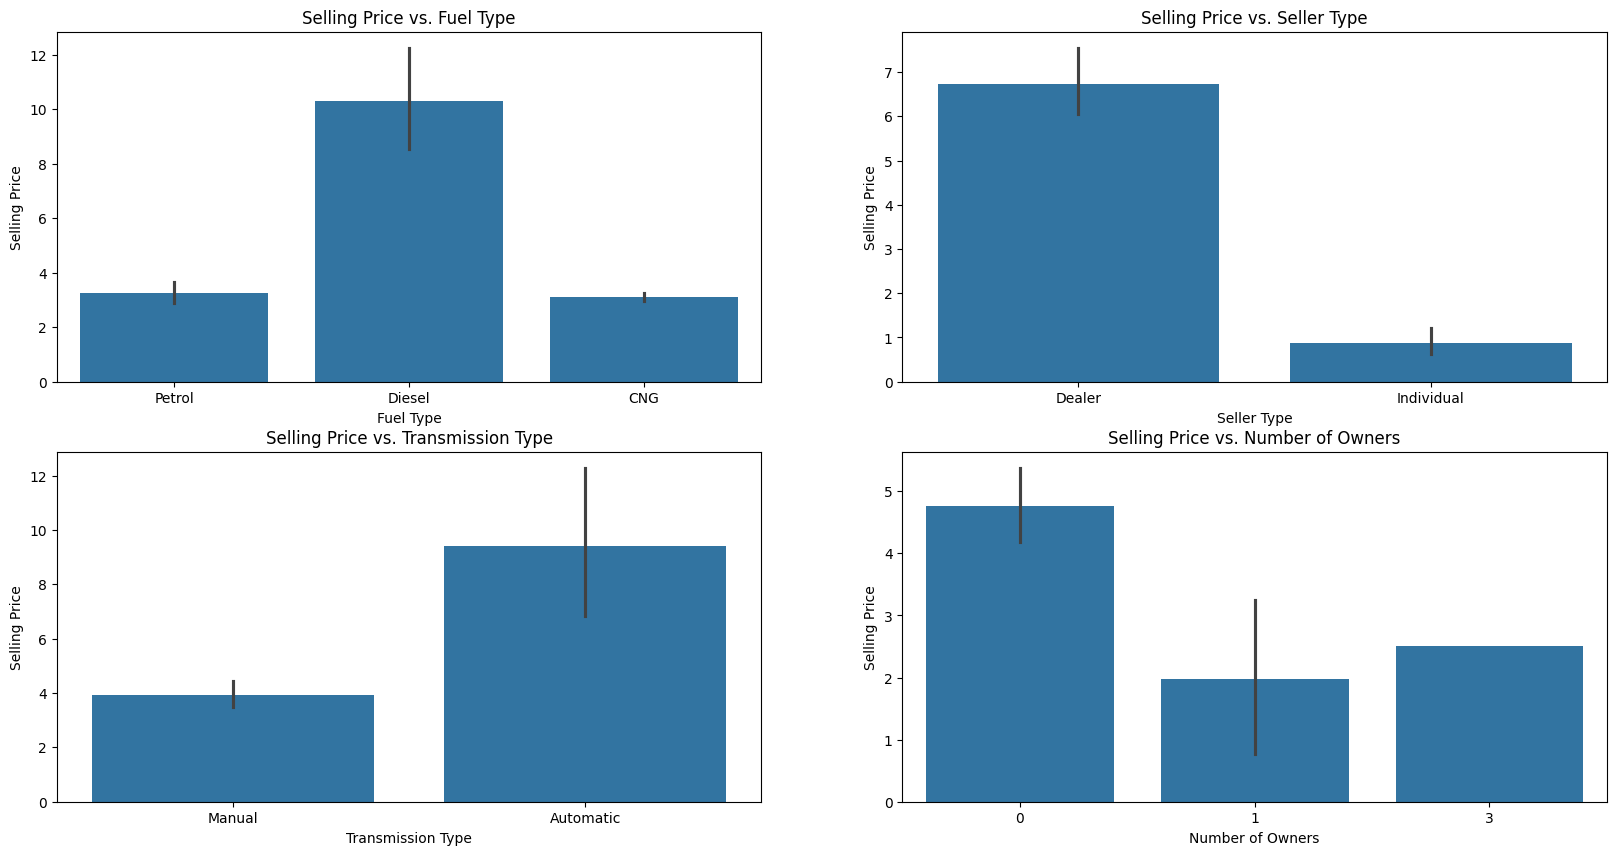

In [198]:
# Chart - 4 Barplot visualization code for categorical variable vs target variable
# Create a 2x2 subplot
plt.figure(figsize=(20,10))

# Subplot 1: Barplot for Selling_Price vs. Fuel_Type
plt.subplot(2,2,1)
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Fuel Type')

# Subplot 2: Barplot for Selling_Price vs. Seller_Type
plt.subplot(2,2,2)
sns.barplot(data=df, x='Selling_type', y='Selling_Price')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Seller Type')

# Subplot 3: Barplot for Selling_Price vs. Transmission
plt.subplot(2,2,3)
sns.barplot(data=df, x='Transmission', y='Selling_Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Transmission Type')

# Subplot 4: Barplot for Selling_Price vs. Owner
plt.subplot(2,2,4)
sns.barplot(data=df, x='Owner', y='Selling_Price')
plt.xlabel('Number of Owners')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Number of Owners')

# Display the plot
plt.show()

##### What is/are the insight(s) found from the chart?

From the above plots we can analyse that:

* The cars with 'Fuel_Type' Diesel has a higher 'Selling_Price' compared to the rest and at the same time cars running on Petrol and CNG are costs less and almost same.
* The cars sold by the 'Seller_Type' Dealers have a higher range whereas Individual sellers cost low.
* The cars with Automatic 'Transmission' costs more than the cars with Manual Transmission.
* First Owner cars holds a higher value in terms of 'Selling_Price' whereas we can also observe that the 'Selling_Price' reduces with an increase in the number of 'Owner'.

#### Chart - 5 : Driven Kilometers vs Selling Price

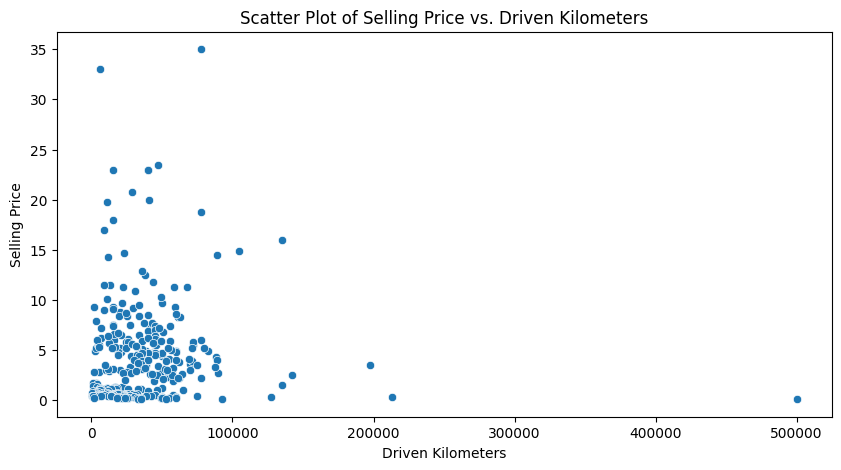

In [199]:
# Chart - 5 Scatter plot visualization code for Driven Kilometers vs Selling Price
# Set the figure size for the plot
plt.figure(figsize=(10,5))

# Create a scatter plot to visualize the relationship between Driven_kms and Selling_Price
sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price')

# Set labels for the x and y axes
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')

# Add a title to the plot
plt.title('Scatter Plot of Selling Price vs. Driven Kilometers')

# Display the plot
plt.show()

##### What is/are the insight(s) found from the chart?

From the above Scatterplot, it can clearly seen that as the number of Driven Kilometers increases, the Selling Price of the car tends to decrease.

#### Chart - 6 - Correlation Heatmap

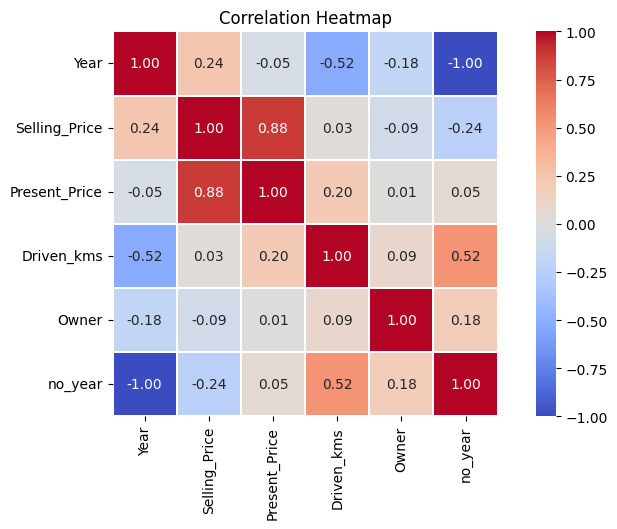

In [200]:

# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=[np.number])

# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df_numeric.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

##### What is/are the insight(s) found from the chart?

From the above correlation heatmap we get to know that, Present price and selling price are positively highly correlated, as 'Present_Price' is likely one of the significant factors that influence the 'Selling_Price' of a car. And 'no_year' and 'Year' are negatively highly correlated.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [201]:
# Check statistical summary
df.describe()


,Year,Selling_Price,Present_Price,Driven_kms,Owner,no_year
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,11.372093
std,2.891554,5.082812,8.642584,38886.883882,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,7.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,9.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,11.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,13.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,22.000000


Look especially at columns like Kms_Driven, Selling_Price, and Present_Price — large differences between mean and max can indicate outliers.

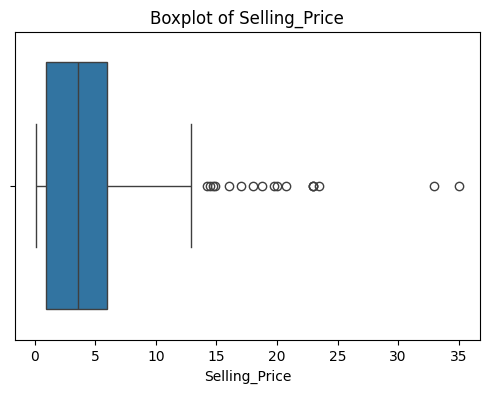

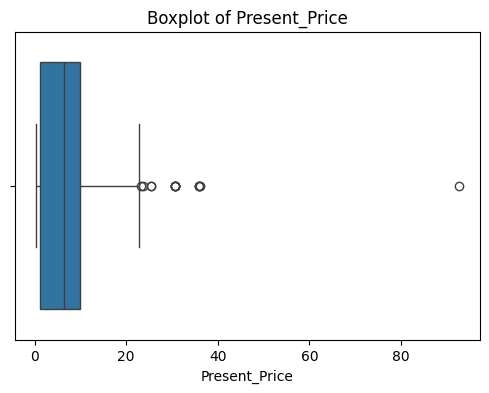

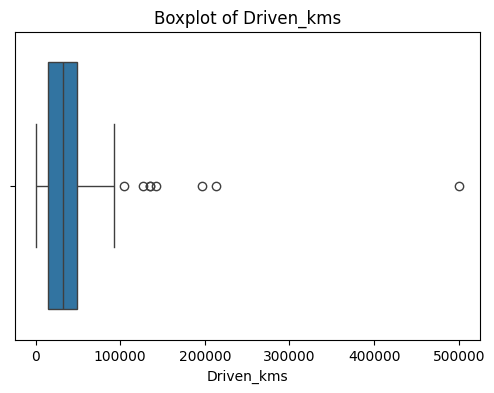

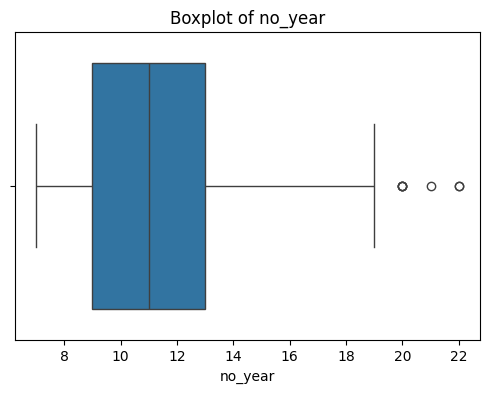

In [202]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numerical columns
numerical_cols = ['Selling_Price', 'Present_Price', 'Driven_kms', 'no_year']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [203]:
# # Function to remove outliers using IQR
# def remove_outliers_iqr(data, column):
#     Q1 =  df.Selling_Price.quantile(0.25)
#     Q3 =  df.Selling_Price.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     filtered_data = data[( df.Selling_Price >= lower_bound) & ( df.Selling_Price <= upper_bound)]
#     return filtered_data

# # Apply for selected columns
# df = remove_outliers_iqr(df, 'Selling_Price')
# df = remove_outliers_iqr(df, 'Present_Price')
# df = remove_outliers_iqr(df, 'Kms_Driven')

# print("Dataset shape after outlier removal:", df.shape)


In [204]:
# Handling Outliers & Outlier treatments
# Removing outliers by Using IQR method:
q1, q3, median = df.Selling_Price.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Selling_Price'] = np.where(df['Selling_Price'] > upper_limit, median,np.where(df['Selling_Price'] < lower_limit,median,df['Selling_Price']))

# Removing outliers by Capping:
for col in ['Present_Price','Driven_kms','Owner','no_year']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

In [205]:
print("Dataset shape after outlier removal:", df.shape)

Dataset shape after outlier removal: (301, 10)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Here i used IQR method and Capping method, Based on IQR method i set Upper limit and Lower limit of Selling Price and convert those outliers into median values.

Also i have capp outliers upto 99th percentile and above that i convert those outliers into upper limit value.

### 2. Categorical Encoding

In [206]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0,11.0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0,12.0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0,8.0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0,14.0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0,11.0


In [207]:
# Before Categorical Encoding, Remove the 'Car Name' as it's no longer needed
df.drop(['Car_Name'], axis=1, inplace=True)

In [208]:
# Using one-hot encoding to convert categorical variables into numerical format
df = pd.get_dummies(df)

In [209]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000.0,0.0,11.0,False,False,True,True,False,False,True
1,2013,4.75,9.54,43000.0,0.0,12.0,False,True,False,True,False,False,True
2,2017,7.25,9.85,6900.0,0.0,8.0,False,False,True,True,False,False,True
3,2011,2.85,4.15,5200.0,0.0,14.0,False,False,True,True,False,False,True
4,2014,4.60,6.87,42450.0,0.0,11.0,False,True,False,True,False,False,True


#### What all categorical encoding techniques have i used & why did i use those techniques?

One hot encoding is used to encode the categorical variables into numerical format.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

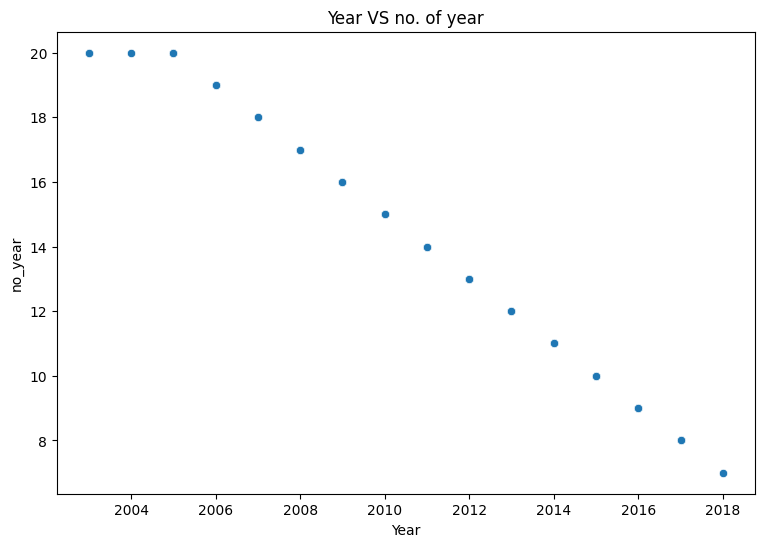

In [210]:
# Manipulate Features to minimize feature correlation and create new features

# We see that the Year and no_year are negatively highly correlated

# Plotting Scatter plot to visualize the relationship between
# Year and no_year
plt.figure(figsize=(9,6))
sns.scatterplot(x='Year',y='no_year',data=df)
plt.xlabel('Year')
plt.ylabel('no_year')
plt.title('Year VS no. of year')
plt.show()

In [211]:
# Correlation
df[['Year','no_year']].corr()

,Year,no_year
Year,1.000000,-0.998376
no_year,-0.998376,1.000000


In [212]:
# Removing 'Year' column as we've already calculated the age in the 'no_year' column
df.drop(['Year'], axis=1, inplace=True)

#### 2. Feature Selection

In [213]:
# Select your features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['Selling_Price']]
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [214]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [215]:
continuous_variables = ['Present_Price', 'Driven_kms', 'Owner', 'no_year']

In [216]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [217]:
continuous_feature_df

,Present_Price,Driven_kms,Owner,no_year
0,5.59,27000.0,0.0,11.0
1,9.54,43000.0,0.0,12.0
2,9.85,6900.0,0.0,8.0
3,4.15,5200.0,0.0,14.0
4,6.87,42450.0,0.0,11.0
...,...,...,...,...
296,11.60,33988.0,0.0,9.0
297,5.90,60000.0,0.0,10.0
298,11.00,87934.0,0.0,16.0
299,12.50,9000.0,0.0,8.0


In [218]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,Present_Price,2.187052
1,Driven_kms,4.509676
2,Owner,1.059124
3,no_year,4.328862


In [219]:
# This is the final data for modeling
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000.0,0.0,11.0,False,False,True,True,False,False,True
1,4.75,9.54,43000.0,0.0,12.0,False,True,False,True,False,False,True
2,7.25,9.85,6900.0,0.0,8.0,False,False,True,True,False,False,True
3,2.85,4.15,5200.0,0.0,14.0,False,False,True,True,False,False,True
4,4.60,6.87,42450.0,0.0,11.0,False,True,False,True,False,False,True


##### What all feature selection methods have i used  and why?

I have used pearson correlation coefficient to check correlation between variables and also with dependent variable.

And also i check the multicollinearity using VIF.

##### Which all features i found important and why?

From above methods i have found that there is negitively high correlation between Year and no_year. So, i take only 'no_year' variable and drop the 'Year' column, as we've already calculated the age in the 'no_year' column.

### 4. Data Transformation

#### Do i think that the data needs to be transformed? If yes, which transformation have i used. Explain Why?

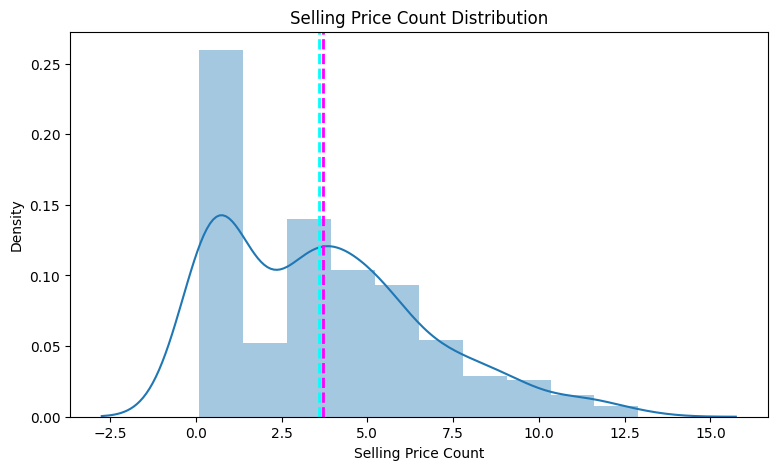

In [220]:
# Transform the data
# Visualizing the distribution of the dependent variable - Selling Price
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [221]:
# Skew of the dependent variable
df[dependent_variable].skew()

Selling_Price    0.757016
dtype: float64

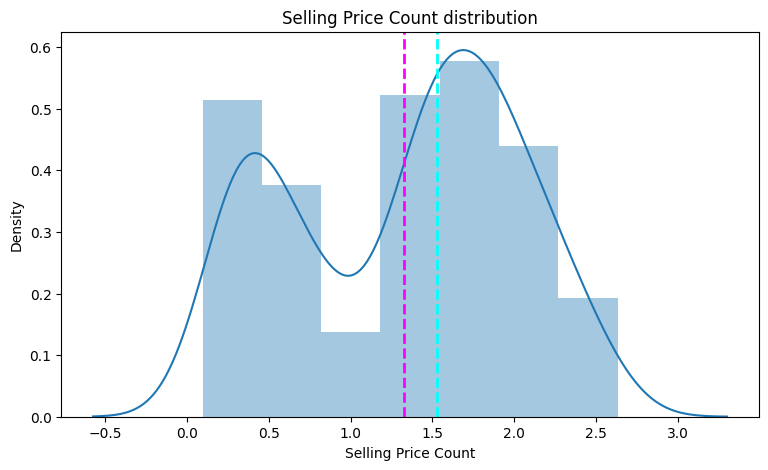

In [222]:
# Visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(9,5))
sns.distplot(np.log1p(df[dependent_variable]))
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count distribution')
plt.axvline(np.log1p(df['Selling_Price']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(df['Selling_Price']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [223]:
# Skew of the dependent variable after log transformation
np.log1p(df[dependent_variable]).skew()

Selling_Price   -0.222356
dtype: float64

In [224]:
# Defining dependent and independent variables
X = df.drop('Selling_Price',axis=1)
y = np.log1p(df[dependent_variable])

In [225]:
X

,Present_Price,Driven_kms,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000.0,0.0,11.0,False,False,True,True,False,False,True
1,9.54,43000.0,0.0,12.0,False,True,False,True,False,False,True
2,9.85,6900.0,0.0,8.0,False,False,True,True,False,False,True
3,4.15,5200.0,0.0,14.0,False,False,True,True,False,False,True
4,6.87,42450.0,0.0,11.0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
296,11.60,33988.0,0.0,9.0,False,True,False,True,False,False,True
297,5.90,60000.0,0.0,10.0,False,False,True,True,False,False,True
298,11.00,87934.0,0.0,16.0,False,False,True,True,False,False,True
299,12.50,9000.0,0.0,8.0,False,True,False,True,False,False,True


In [226]:
y

,Selling_Price
0,1.470176
1,1.749200
2,2.110213
3,1.348073
4,1.722767
...,...
296,2.351375
297,1.609438
298,1.470176
299,2.525729


In [227]:
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

I have ploted distribution plot and also i did normality test and i have found that the data is not normally distributed, it needs transformation.

So, i have calculate the skewness value and i have found that the selling price attribute is positively skewed so i used log transformation & now the data looks normally distrubuted & skewness is also reduced.

### 5. Data Scaling

In [228]:
features = [i for i in df.columns if i not in ['Selling_Price']]

In [229]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

##### Which method have i used to scale the data and why?

In this i have different independent features of different scale so i have used standard scalar method to scale our independent features into one scale.

### 6. Data Splitting

In [230]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [231]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Selling_Price
1.526056         11
0.470004          6
0.371564          6
0.182322          5
1.609438          5
                 ..
1.294727          1
1.266948          1
1.208960          1
1.131402          1
2.602690          1
Name: count, Length: 116, dtype: int64

In [232]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (210, 11)
y_train: (210, 1)
X_test: (91, 11)
y_test: (91, 1)


## ***6. ML Model Implementation***

In [233]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 5 important features, and returns a list of the model scores'''

  # Apply inverse log transformation to y_test and y_pred as we have used log transformation
  y_t = np.exp(y_test)
  y_p = np.exp(y_pred)
  y_train2 = np.exp(y_train)
  y_train_pred = np.exp(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Selling Price', fontsize=12)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances
  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(7,4))
  plt.title('Feature Importances (top 5) for '+str(model), fontsize = 12)
  plt.xlabel('Relative Importance')
  feat.nlargest(5).plot(kind='barh')


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [234]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### ML Model - 1 : Linear Regression

In [235]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

In [236]:
import time

In [237]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Data scaling
    ('lr_model', LinearRegression())    # Model
])

In [238]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr_model', LinearRegression())])

In [239]:
y_pred = pipeline.predict(X_test)

# Evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Pipeline RMSE: {rmse:.2f}")
print(f"Pipeline R² Score: {r2:.2f}")


Pipeline RMSE: 0.31
Pipeline R² Score: 0.78


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 4.169924716556089
RMSE : 2.0420393523524685
MAE : 1.2891485919279801
Train R2 : 0.6421421951879258
Test R2 : 0.4924417983344852
Adjusted R2 :  0.4217691373430844
Training Time: 0.0592 seconds


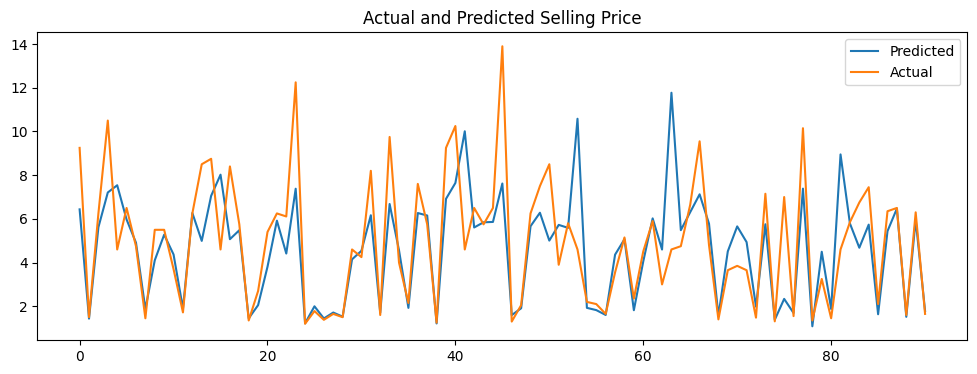

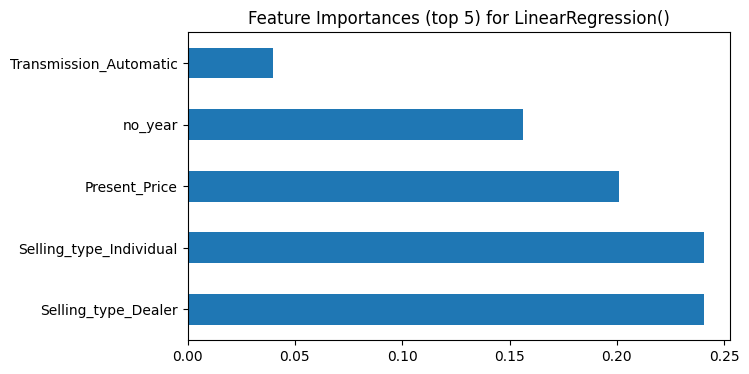

In [240]:
# Visualizing evaluation Metric Score chart
start_time = time.time()
linear_score = evaluate_model(reg, y_test,y_pred_li)
end_time = time.time()
print(f"Training Time: {end_time - start_time:.4f} seconds")
score['Linear regression'] = linear_score

In [241]:
# Updated Evaluation Metric Score chart
score

,Linear regression
MSE,4.169925
RMSE,2.042039
MAE,1.289149
Train R2,0.642142
Test R2,0.492442
Adjusted R2,0.421769


#### 2. Cross- Validation & Hyperparameter Tuning

In [242]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
# Start timer
start_time = time.time()
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)
# End timer
end_time = time.time()
print(f"Training Time: {end_time - start_time:.4f} seconds")

Training Time: 0.0595 seconds


In [243]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8058936696873664


In [244]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [245]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 4.169924716556089
RMSE : 2.0420393523524685
MAE : 1.2891485919279801
Train R2 : 0.6421421951879258
Test R2 : 0.4924417983344852
Adjusted R2 :  0.4217691373430844


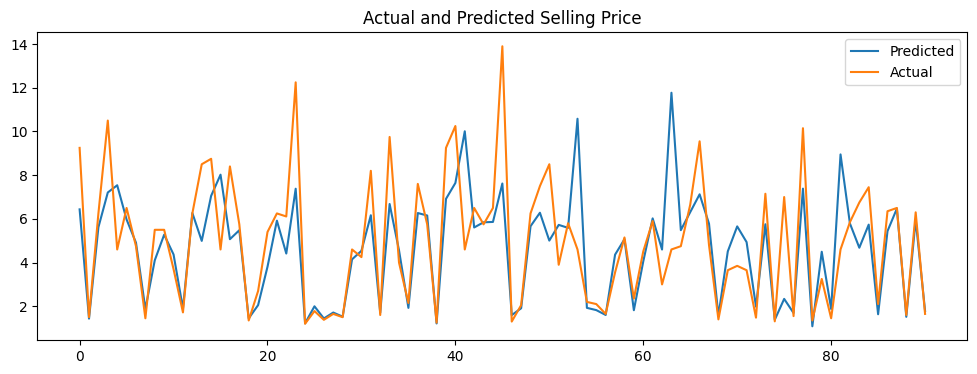

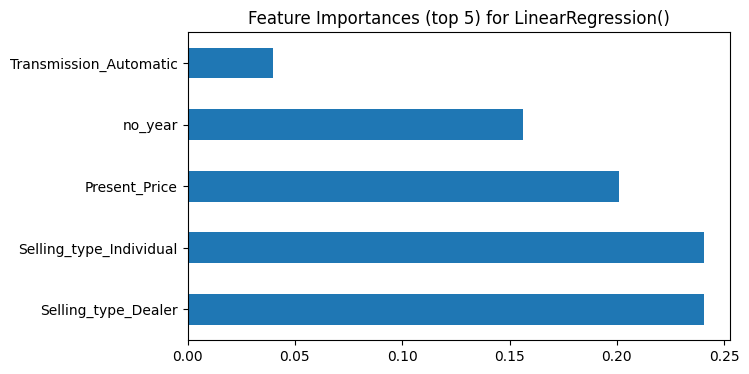

In [246]:
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [247]:
# Updated Evaluation Metric Score chart
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,4.169925,4.169925
RMSE,2.042039,2.042039
MAE,1.289149,1.289149
Train R2,0.642142,0.642142
Test R2,0.492442,0.492442
Adjusted R2,0.421769,0.421769


##### Which hyperparameter optimization technique have i used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort i have used GridSearchCV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For untuned model, I found R2 score of 0.642142 & 0.492442 for train and test set. And 4.169925 and 1.289149 as MSE and MAE respectively.

For tuned model, I found R2 score of 0.642142 & 0.492442 for train and test set. And 4.169925 and 1.289149 as MSE and MAE respectively.

For Both tuned and untuned model, **no improvement** is seen.

### ML Model - 2 : Lasso Regression

In [248]:
# Import the Lasso Regression class
lasso = Lasso()

# Fit the lasso regression model to the training data
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_lasso1 = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 9.807266785467892
RMSE : 3.1316555981569705
MAE : 2.513357873886036
Train R2 : -0.10059179585999933
Test R2 : -0.19372867167662267
Adjusted R2 :  -0.35994405634045634


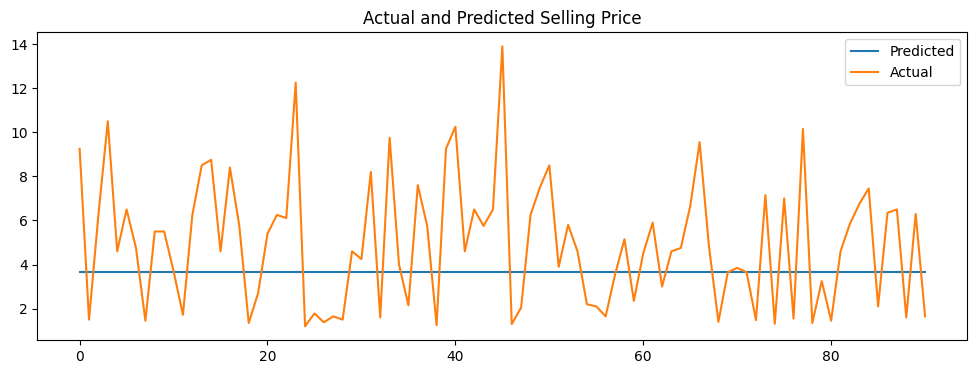

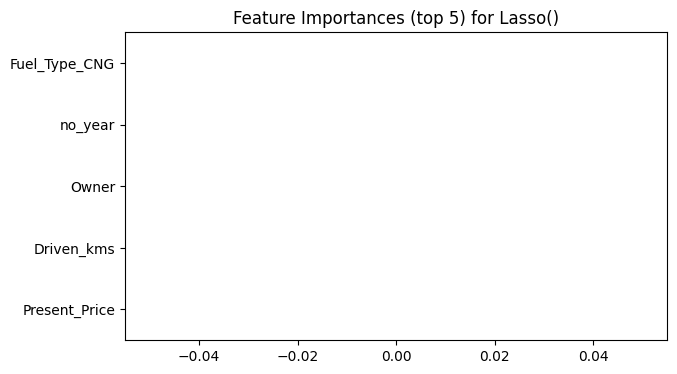

In [249]:
# Visualizing evaluation Metric Score chart
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [250]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression
MSE,4.169925,4.169925,9.807267
RMSE,2.042039,2.042039,3.131656
MAE,1.289149,1.289149,2.513358
Train R2,0.642142,0.642142,-0.100592
Test R2,0.492442,0.492442,-0.193729
Adjusted R2,0.421769,0.421769,-0.359944


It is seen that using Lasso regression analysis the performance of the model has drop down. So i will try to tuned the model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [251]:
# Define the model
lasso = Lasso()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [252]:
# Getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.09201807273836608


In [253]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict the model
y_pred_lassocv = lasso.predict(X_test)

MSE : 4.143092228273675
RMSE : 2.0354587267428625
MAE : 1.2972252346842903
Train R2 : 0.6362928099908935
Test R2 : 0.49570781641024586
Adjusted R2 :  0.425489917429394


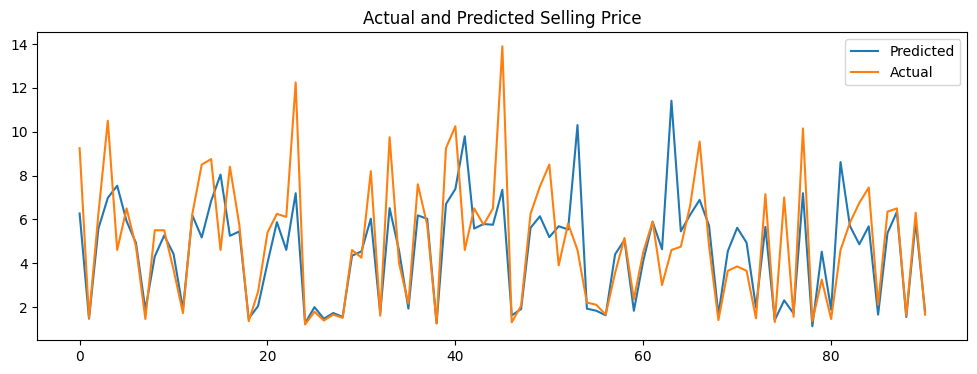

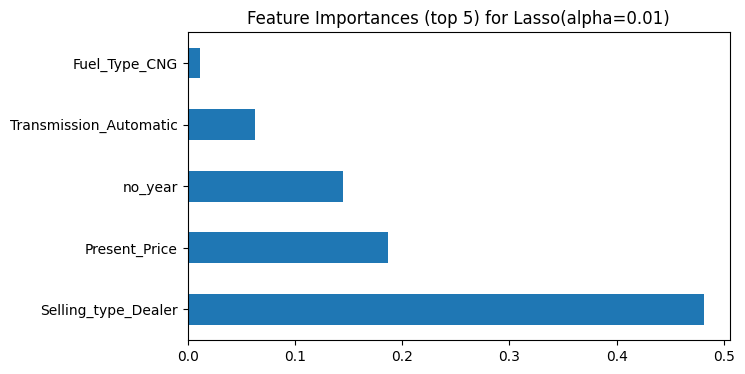

In [254]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort i have used GridSearchCV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [255]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01
MSE,4.169925,4.169925,9.807267,4.143092
RMSE,2.042039,2.042039,3.131656,2.035459
MAE,1.289149,1.289149,2.513358,1.297225
Train R2,0.642142,0.642142,-0.100592,0.636293
Test R2,0.492442,0.492442,-0.193729,0.495708
Adjusted R2,0.421769,0.421769,-0.359944,0.425490


After tuning i have seen that there is increase in test set performance, which is upto 49%

### ML Model - 3 : Ridge Regression

In [256]:
# Ridge regressor class
ridge = Ridge()

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 4.1603985933002665
RMSE : 2.039705516318536
MAE : 1.2889405804291558
Train R2 : 0.6419159865096081
Test R2 : 0.49360130655519063
Adjusted R2 :  0.4230900960755336


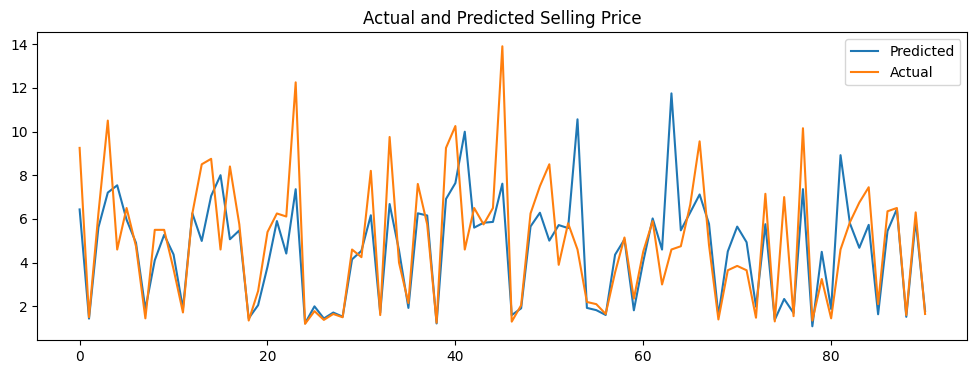

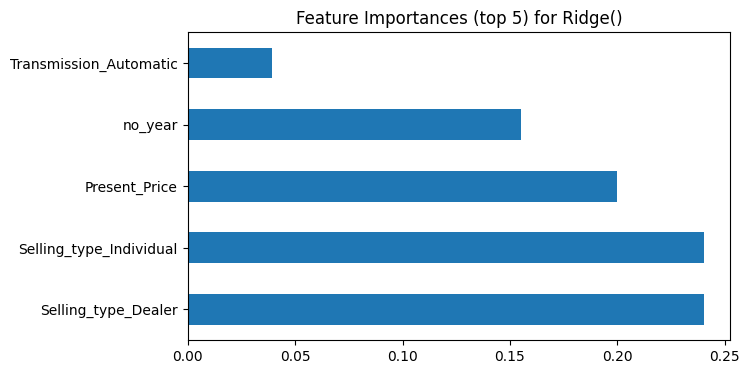

In [257]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

In [258]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge
MSE,4.169925,4.169925,9.807267,4.143092,4.160399
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706
MAE,1.289149,1.289149,2.513358,1.297225,1.288941
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090


I have used Ridge regression technique to check the performance of the model and i have found that there is no majorly difference in between linear regression and Ridge. Both models are quite similar.

#### 2. Cross- Validation & Hyperparameter Tuning

In [260]:
# Import Ridge regressor Class
ridge = Ridge()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [261]:
# Getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.09239471817150409


In [262]:
# Initiate ridge with best alpha
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)

MSE : 4.089084352387011
RMSE : 2.0221484496413735
MAE : 1.2916996819222408
Train R2 : 0.639256952993154
Test R2 : 0.5022815898531987
Adjusted R2 :  0.4329790264150365


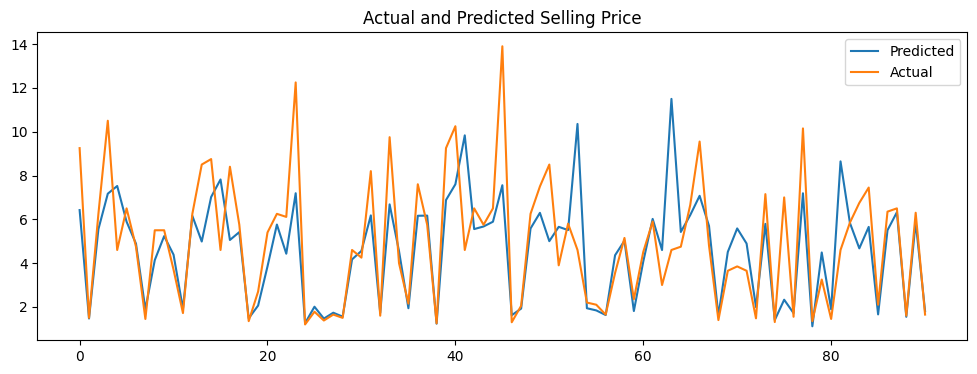

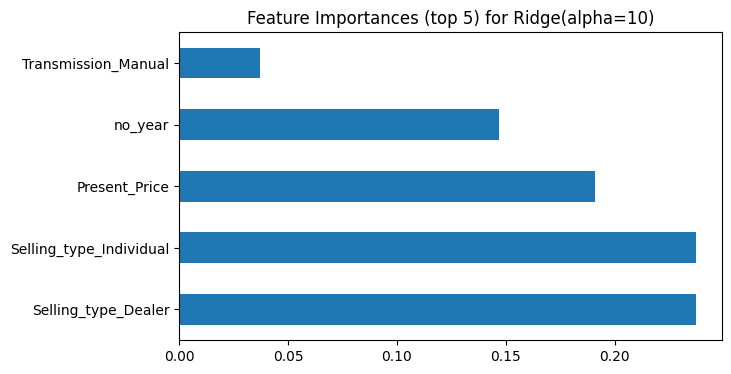

In [263]:
# Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

##### Which hyperparameter optimization technique have i used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [264]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979


I have tuned Ridge regression using hyperparametric technique & check the performance of the model and i have found that the tuned Ridge regression model give the better accuracy compare to the untuned model for the test set.

### ML Model - 4 : Decision Tree

In [265]:
# Import Decision Tree Regressor class
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 0.8086538461538465
RMSE : 0.8992518257717615
MAE : 0.58978021978022
Train R2 : 1.0
Test R2 : 0.901571630227721
Adjusted R2 :  0.8878664141834797


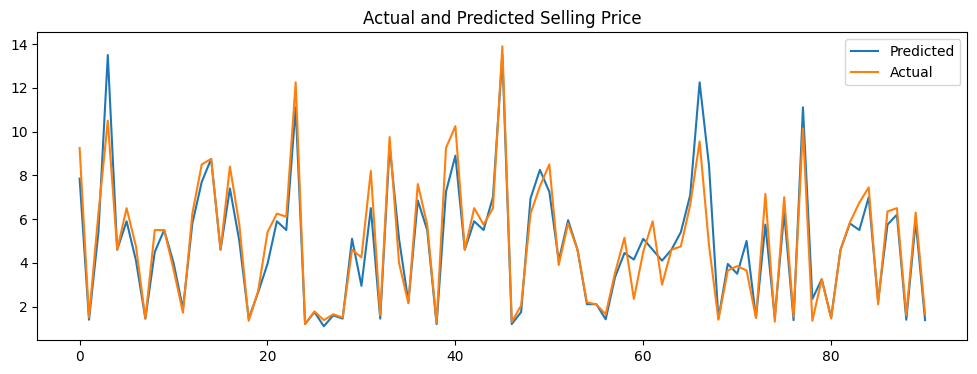

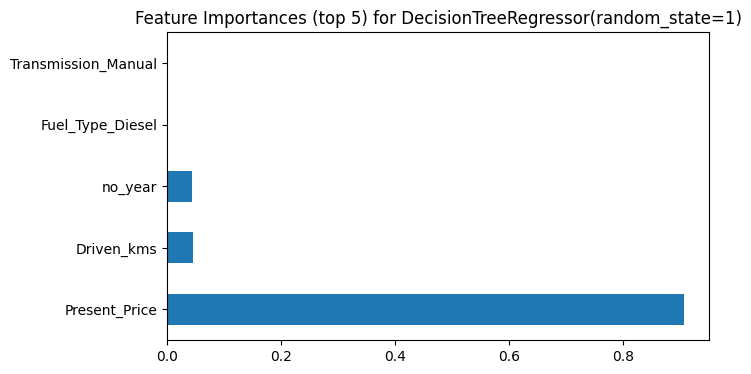

In [266]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [267]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.808654
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.899252
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.589780
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.901572
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.887866


From the decision tree algorithm i got train R2 score is 1 and test R2 score is 90% which shows the overfitting condition on train dataset.

So, i have decided to tune the data using GridSearchCV.

#### 2. Cross- Validation & Hyperparameter Tuning

In [268]:
# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# Fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [ ]:
dt_best_params

In [ ]:
# Building Decision Tree model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

In [ ]:
# Fitting model
dt_model.fit(X_train,y_train)

In [ ]:
# Predict on the model
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluation matrices for DecisionTree
result = evaluate_model(dt_model, y_test,y_pred_dt)
score['Decision tree tuned'] = result

In [ ]:
# Decision tree diagram
graph = Source(tree.export_graphviz(dt_model,
                                    out_file=None,
                                    feature_names=features,
                                    filled= True))
display(SVG(graph.pipe(format='svg')))

##### Which hyperparameter optimization technique have i used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation Metric Score Chart
score

From the above tuned Decision tree regression, it has seen that earlier we have faced overfitting condition. After tuning it there is no such condition and it looks like model performs with good accuracy around 76% on train and 70% on test data.

### ML Model - 5 : Random Forest

In [ ]:
# Import Random Forest Regressor class
rf = RandomForestRegressor(random_state=0)

# Fit the Random Forest model to your training data
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 = rf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [ ]:
# Updated Evaluation Metric Score chart
score

Here i have seen that using random forest, regression accuracy of the train and test model increases 98% and 93% respectively, which seems to be a good model for prediction.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

In [ ]:
# Fitting a Random Forest model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [ ]:
# Best parameters for random forests
rf_best_params

In [ ]:
# Building Random Forest model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [ ]:
# Fitting model
rf_model.fit(X_train,y_train)

In [ ]:
# Predict on the model
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluation matrices for RandomForest
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

In [ ]:
model=rf_model

In [ ]:
  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances
  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(7,4))
  plt.title('Feature Importances (top 5) for '+str(model), fontsize = 12)
  plt.xlabel('Relative Importance')
  feat.nlargest(5).plot(kind='barh')

In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure X_train has feature names
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=features)

# Run SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train)

# Feature importance extraction
try:
    importance = model.feature_importances_
except:
    importance = model.coef_

importance = np.abs(importance)
if len(importance) == len(features):
    pass
else:
    importance = importance[0]

# Bar chart of top 5 important features
feat = pd.Series(importance, index=features)
plt.figure(figsize=(7,4))
plt.title('Feature Importances (top 5) for ' + str(type(model).__name__), fontsize=12)
plt.xlabel('Relative Importance')
feat.nlargest(5).plot(kind='barh')
plt.tight_layout()
plt.show()


In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Make sure X_train has column names
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=features)

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# Select mean absolute SHAP values and get top 5 features
shap_sum = np.abs(shap_values.values).mean(axis=0)
top5_idx = np.argsort(shap_sum)[-5:]
top5_features = X_train.columns[top5_idx]

# Subset SHAP values and data for top 5 features
shap.summary_plot(shap_values[:, top5_idx], X_train.iloc[:, top5_idx])


In [ ]:
import shap
import matplotlib.pyplot as plt

# Create explainer if not done already
explainer = shap.Explainer(rf_model, X_train)

# Compute SHAP values
shap_values = explainer(X_train)

# Show SHAP force plot for one instance using Matplotlib
instance_idx = 0  # You can change this to any row index
shap.plots.force(shap_values[instance_idx], matplotlib=True)


In [ ]:
shap.initjs()
shap.plots.force(shap_values[instance_idx])  # No matplotlib=True


In [ ]:
shap.plots.force(shap_values[instance_idx], matplotlib=True)


In [ ]:
import shap
import matplotlib.pyplot as plt

# Make sure your X_train is a DataFrame with proper column names
explainer = shap.Explainer(rf_model, X_train)  # Use your model and training data
shap_values = explainer(X_train)

# Pick the instance to explain (e.g., first one)
instance_idx = 0

# Create waterfall plot
shap.plots.waterfall(shap_values[instance_idx])


In [ ]:
X_train = pd.DataFrame(X_train, columns=feature_names)


##### Which hyperparameter optimization technique have i used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation Metric Score chart
score

After tuning the random forest model it has seen that there is drop in performance both in train and test score so i am not going to use this model.

### ML Model - 6 : Gradient Boosting Regressor

In [ ]:
# Import Gradient Boosting Regressor class
gb = GradientBoostingRegressor(random_state=0)

# Fit the Gradient Boosting model to the training data
gb.fit(X_train,y_train)

# Predict on the model
y_pred_gb1 = gb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

In [ ]:
# Updated Evaluation Metric Score chart
score

Using Gradient Boosting Regressor i have got accuracy around 98% and 90% on train and test data respectively, which is less than random forest, decision tree algorithm.

So, lets tune it.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],
             'min_samples_leaf':np.arange(20,24),
             'max_depth':np.arange(14,17)
             }

In [ ]:
# Perform the randomized search
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

gb_best_params = random_search.best_params_

In [ ]:
# Best parameters for Gradient Boosting Model
gb_best_params

In [ ]:
# Building Gradient Boosting Model with best parameters
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],
                                     random_state=0)

In [ ]:
# Fitting model
gb_model.fit(X_train,y_train)

In [ ]:
# Predict on the Model
y_pred_gb = gb_model.predict(X_test)

In [ ]:
# Evaluation matrices for GradientBoosting
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result

##### Which hyperparameter optimization technique have i used and why?

Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

Because of its randomly sampling technique and to save the time i have decided to use Randomized search CV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation Metric Score chart
score

After using the Randomised search CV, it gave accuracy 96% on train data & 88% on test data which is comparatively less than the untuned model.

### ML Model - 7 : Extreme Gradient Boosting Regressor

In [ ]:
# Import Extreme Gradient Boosting Regressor class
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:linear')

# Fit the Extreme Gradient Boosting model to the training data
xgb_model.fit(X_train,y_train)

# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Extreme Gradient Boosting Regressor'] = result

In [ ]:
# Updated Evaluation Metric Score chart
score

Using Extreme Gradient Boosting Regressor i have got accuracy around 99% and 88% on train and test data respectively. It is overfitting the model's training accuracy is almost 100%.

So, lets tune it.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# XG boost model
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:linear')
xgb_params = {
    'n_estimators': [500],
    'min_child_weight': np.arange(20, 22)
}


In [ ]:
# Perform the randomized search
xgb_search = RandomizedSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error',n_iter=100, n_jobs=-1)
xgb_search.fit(X_train,y_train)
xgb_best_params = xgb_search.best_params_

In [ ]:
# Best parameters for XG boost Model
xgb_best_params

In [ ]:
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_child_weight'],
                             random_state=0)

In [ ]:
# Fitting model
xgb_model.fit(X_train,y_train)

In [ ]:
# Predict on the model
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Evaluation matrices for XGBRegressor
result = evaluate_model(xgb_model, y_test,y_pred_xgb)
score['Extreme Gradient Boosting Regressor Tuned'] = result

##### Which hyperparameter optimization technique have you used and why?

Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

Because of its randomly sampling technique and to save the time i have decided to use Randomized search CV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Updated Evaluation Metric Score chart
score

After tuning the model i have got the same accuracy on train and test data. Both are overfitted model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the individual models
rf = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)
dt = DecisionTreeRegressor(max_depth=8, random_state=42)

# Create the ensemble
ensemble = VotingRegressor(estimators=[
    ('rf', rf),
    ('dt', dt)
])

# Fit the ensemble
ensemble.fit(X_train, y_train)

# Predict
y_pred = ensemble.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Averaging Ensemble (RF + DT) RMSE: {rmse:.4f}")


### Plot R2 scores for each model

In [ ]:
score.columns

In [ ]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

### 1. Which Evaluation metrics did i consider for a positive business impact and why?

On the basis of all the model i have decided to select R2 score Evaluation matrics which shows the accuracy of the model which is very good indicator to check the feasibility of the model.

### 2. Which ML model did i choose from the above created models as the final prediction model and why?

I have ran a several models like linear regression, decision tree, random forest, gradient boosting, and xtreame gradient boosting but amongst them i have selected random forest model as i achieved 98% training accuracy and 93% testing accuracy. Some models were overfitted so i did not consider them.

## ***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import pickle
# Save the model to a pickle file
with open("random_forest_regression_model.pkl", "wb") as f:
  pickle.dump(rf, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the model from the pickle file
with open("random_forest_regression_model.pkl", "rb") as f:
    loaded_rf_model = pickle.load(f)

new_test_preds = loaded_rf_model.predict(X_test)

# Sanity Check
mse = mean_squared_error(y_test, new_test_preds)
mae = mean_absolute_error(y_test, new_test_preds)
r2 = r2_score(y_test, new_test_preds)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

# **Conclusion**

This project explores the automotive industry's intricate dynamics, aiming to predict car prices with machine learning. By analyzing various factors such as fuel type, seller type, and transmission, we uncover valuable insights and select a robust model for accurate price prediction.

**Key Insights:**

- The 'city' model is the top-selling car, followed by 'corolla altis,' 'verna,' 'fortuner,' and 'brio,' providing a snapshot of popular car models in the market.

- The year 2015 saw the highest number of car purchases, making it the most favored year for buying cars, followed by 2016 and 2014.

- 'Petrol' is the predominant fuel type for cars in the dataset, surpassing 'Diesel' and 'CNG,' indicating fuel preference among buyers.

- The majority of cars are sold through dealers, underscoring the role of dealerships in the automotive market.

- 'Manual' transmission cars significantly outnumber 'Automatic' transmission cars, showcasing consumer transmission preferences.

- 'First Owner' cars generally command higher 'Selling_Price,' while 'Second' or 'Third Owner' cars often have lower prices.

- 'Diesel' cars tend to have higher 'Selling_Price' compared to 'Petrol' or 'CNG' vehicles, emphasizing the influence of fuel type on car pricing.

- 'Dealer' sellers usually ask for higher prices than 'Individual' sellers, revealing the impact of seller type on prices.

- 'Automatic' transmission cars typically have higher prices than their 'Manual' counterparts, reflecting consumer preferences.

- 'Owner' count plays a role in car pricing, with 'First Owner' cars being more expensive than 'Second' or 'Third Owner' cars.

- The relationship between driven kilometers and 'Selling_Price' is negative, suggesting that cars with fewer kilometers tend to have higher selling prices.

- Various machine learning models were assessed, with the Random Forest model being chosen for car price prediction due to its robust performance.

- The project used the R2 score as the primary evaluation metric to assess model accuracy.

- The Random Forest model achieved impressive accuracy with 98% training accuracy and 93% testing accuracy, making it a suitable choice for car price prediction.

The insights provide a holistic understanding of the factors influencing car prices, both from exploratory data analysis and machine learning model perspectives. The Random Forest model's accuracy underscores its potential for practical applications in the automotive market.

This project has not only equipped us with valuable data science skills but has also deepened our understanding of car pricing, making it a significant step in the field of data science and machine learning.